## Порядко-статистические фильтры

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
%matplotlib inline

In [2]:
from itertools import product

Будем окаямлять рамкой из нулей изображение, а затем проходиться фильтром.

In [3]:
def order_stat_filter(image, filter_size, k):
    assert filter_size % 2 == 1
    result = np.empty(image.shape)
    additional_size = filter_size - 1
    extended_image = np.zeros((image.shape[0] + additional_size, image.shape[1] + additional_size), dtype=int)
    extended_image[filter_size // 2:-filter_size // 2 + 1, filter_size // 2:-filter_size // 2 + 1] = image
    for i,j in product(range(image.shape[0]), range(image.shape[1])):
        windowed = extended_image[i:i+filter_size, j:j+filter_size]
        result[i, j] = np.partition(windowed.flatten(), k)[k]
    return result

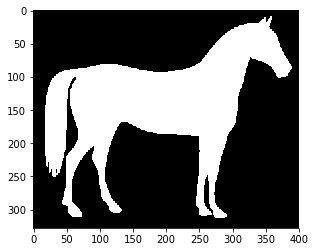

In [4]:
from skimage import data

horse = np.logical_not(data.horse())
plt.imshow(horse, cmap='gray')

Иллюстрация для фильтров 3х3, 5х5, 7х7 и минимума. Видим, что линии делаются тоньше.

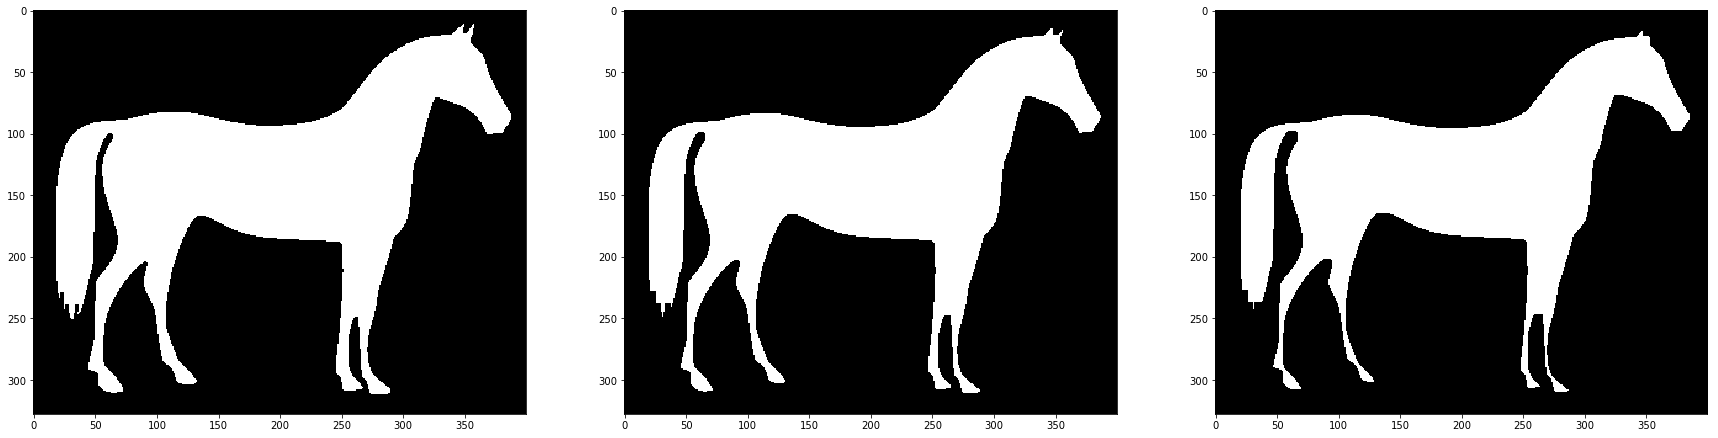

In [5]:
fig, axes = plt.subplots(1,3)
fig.set_figwidth(30)
fig.set_figheight(30)
axes[0].imshow(order_stat_filter(horse, 3, 1), cmap='gray')
axes[1].imshow(order_stat_filter(horse, 5, 1), cmap='gray')
axes[2].imshow(order_stat_filter(horse, 7, 1), cmap='gray')

Иллюстрация для фильтров 3х3, 5х5, 7х7 и какой-то большой статистики. Наоборот идет утолщение.

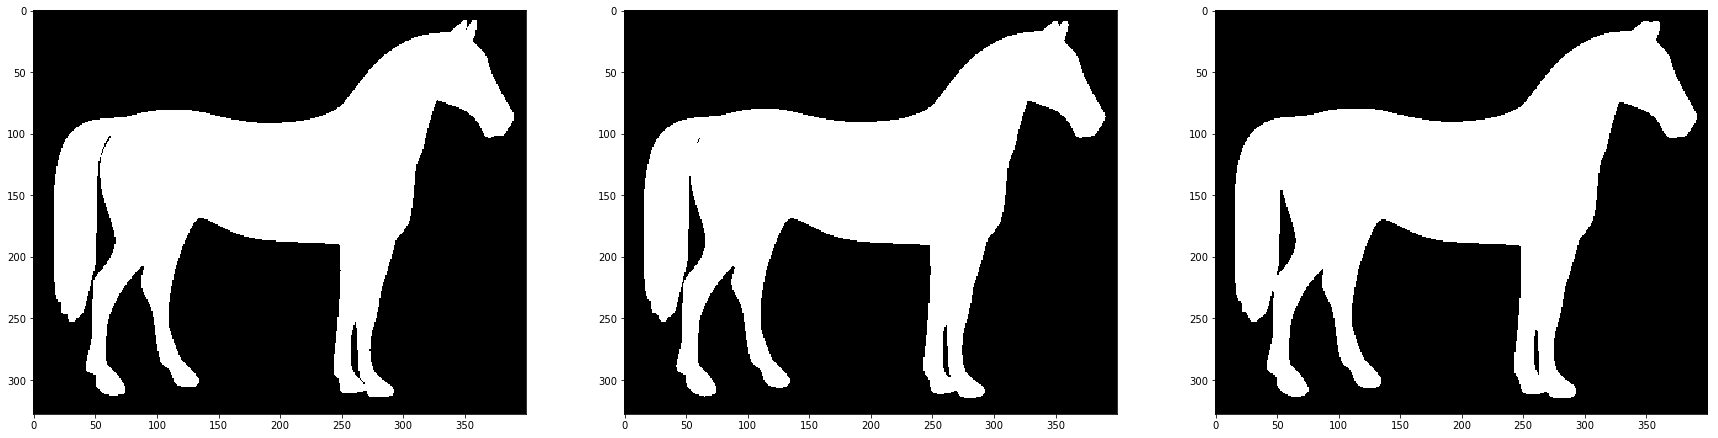

In [6]:
fig, axes = plt.subplots(1,3)
fig.set_figwidth(30)
fig.set_figheight(30)
axes[0].imshow(order_stat_filter(horse, 3, 8), cmap='gray')
axes[1].imshow(order_stat_filter(horse, 5, 20), cmap='gray')
axes[2].imshow(order_stat_filter(horse, 7, 40), cmap='gray')

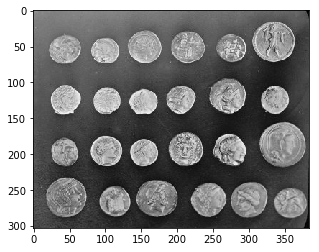

In [7]:
coins = data.coins()
plt.imshow(coins, cmap='gray')

Аналогично для полутонового изображения. Кроме эффектов для бинарного видим еще и размазывание.

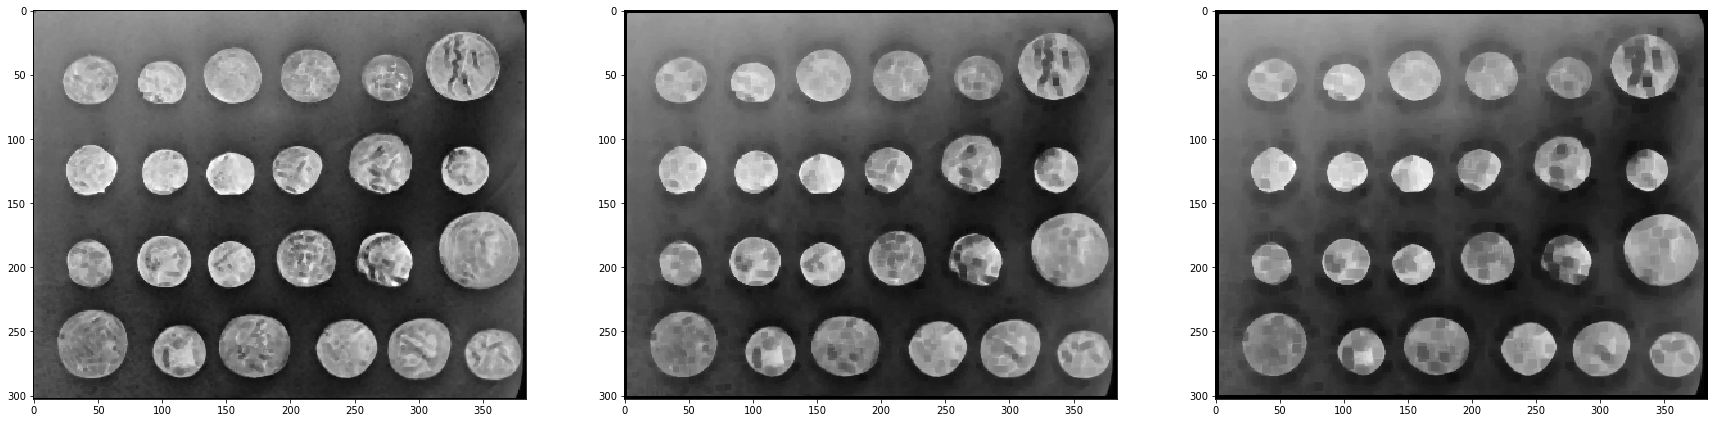

In [8]:
fig, axes = plt.subplots(1,3)
fig.set_figwidth(30)
fig.set_figheight(30)
axes[0].imshow(order_stat_filter(coins, 3, 1), cmap='gray')
axes[1].imshow(order_stat_filter(coins, 5, 1), cmap='gray')
axes[2].imshow(order_stat_filter(coins, 7, 1), cmap='gray')

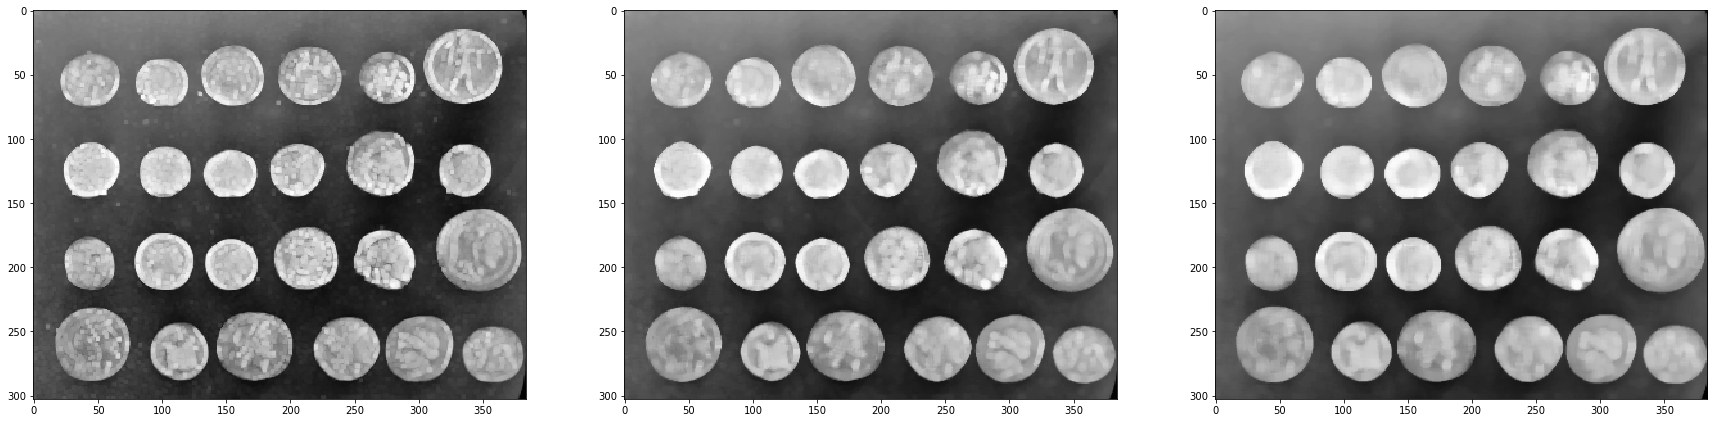

In [9]:
fig, axes = plt.subplots(1,3)
fig.set_figwidth(30)
fig.set_figheight(30)
axes[0].imshow(order_stat_filter(coins, 3, 8), cmap='gray')
axes[1].imshow(order_stat_filter(coins, 5, 20), cmap='gray')
axes[2].imshow(order_stat_filter(coins, 7, 40), cmap='gray')